In [41]:
import cv2
import matplotlib.pyplot as plt      # help visualize imgs
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# Display Cropped Image

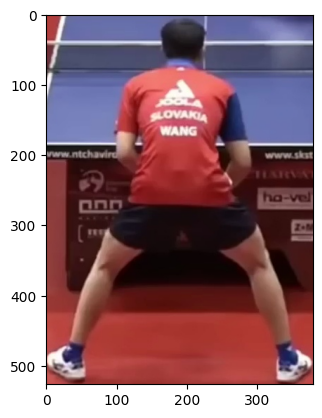

In [46]:
imagePath = "./output_videos/croppedImg.jpg"
image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Get Top Half of Image

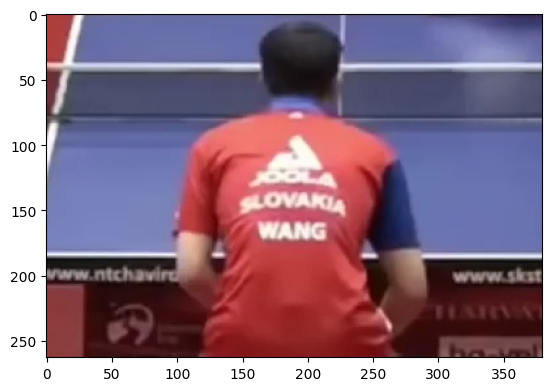

In [47]:
topHalfImg = image[0 : int(image.shape[0] / 2), :]
plt.imshow(topHalfImg)
plt.show()

# Cluster the Image into Two Clusters

Sorted cluster centers (in RGB): [array([105.85148515,  36.04057286,  37.96496806]), array([219.58239095, 145.90037695, 150.91949381]), array([110.91226895, 116.61244252, 170.94418222]), array([ 80.23831824,  77.341867  , 105.70756582])]
Pixel counts for each cluster: [33061, 32816, 19191, 14872]
[0 0 0 ... 3 3 3]


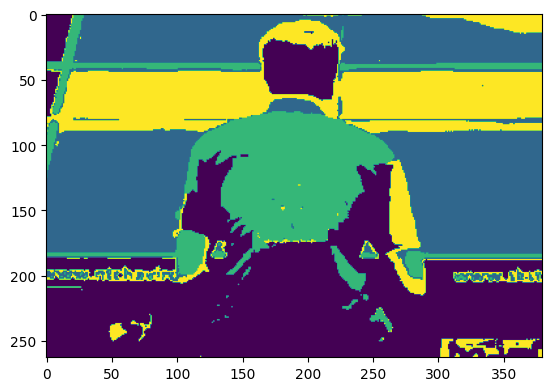

In [55]:
# reshape image into 2d array
image_2d = topHalfImg.reshape(-1, 3)

# perform means clustering with 2 clusters
# cluster image into background color (grass) and jersey color
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(image_2d)

# Get the cluster labels and the cluster centers (dominant colors)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# count the number of pixels in each cluster
label_counts = Counter(labels)

# sort cluster centers by the number of pixels assigned to each
sorted_centers = [centers[i] for i in label_counts.keys()]
sorted_counts = sorted(label_counts.values(), reverse=True)

print("Sorted cluster centers (in RGB):", sorted_centers)
print("Pixel counts for each cluster:", sorted_counts)

# rehshape the labels to the original image shape
clustered_image = labels.reshape(topHalfImg.shape[0], topHalfImg.shape[1])

print(labels)

# display the clustered image
plt.imshow(clustered_image)
plt.show()

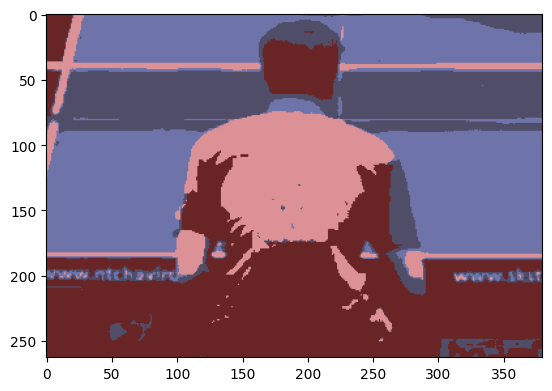

In [49]:
# map each cluster label to its corresponding color
clustered_image_rgb = centers[clustered_image].astype(int)
plt.imshow(clustered_image_rgb)
plt.show()

# Get Center Color of Clustered Image

In [54]:
height, width, _ = clustered_image_rgb.shape
centerX, centerY = width // 2, height // 2
centerPixelRGB = clustered_image_rgb[centerY, centerX]

print(centerX, centerY)

print(centerPixelRGB)

190 131
[219 145 150]
